# Importing Dataset

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings(action='ignore')
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv('fetal_health.csv')

In [ ]:
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Exploratory Data Analysis

In [ ]:
eda_df = data.copy()

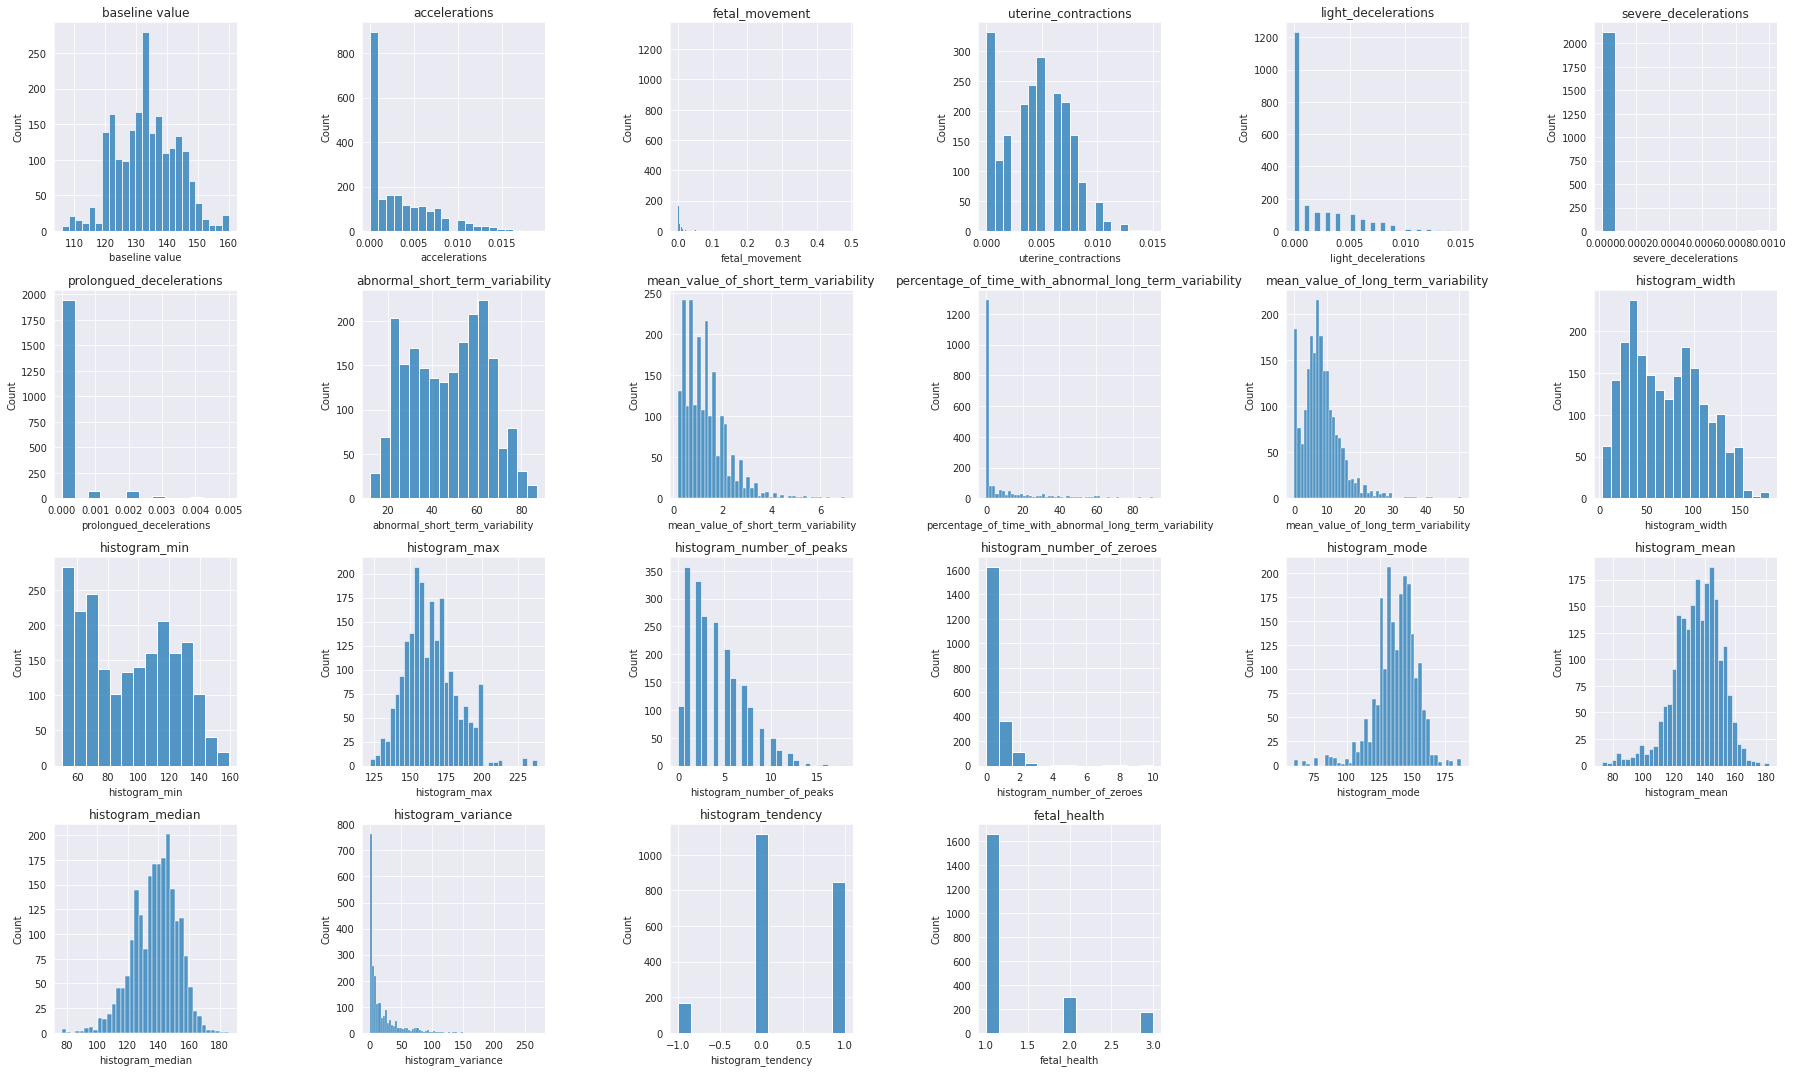

In [ ]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

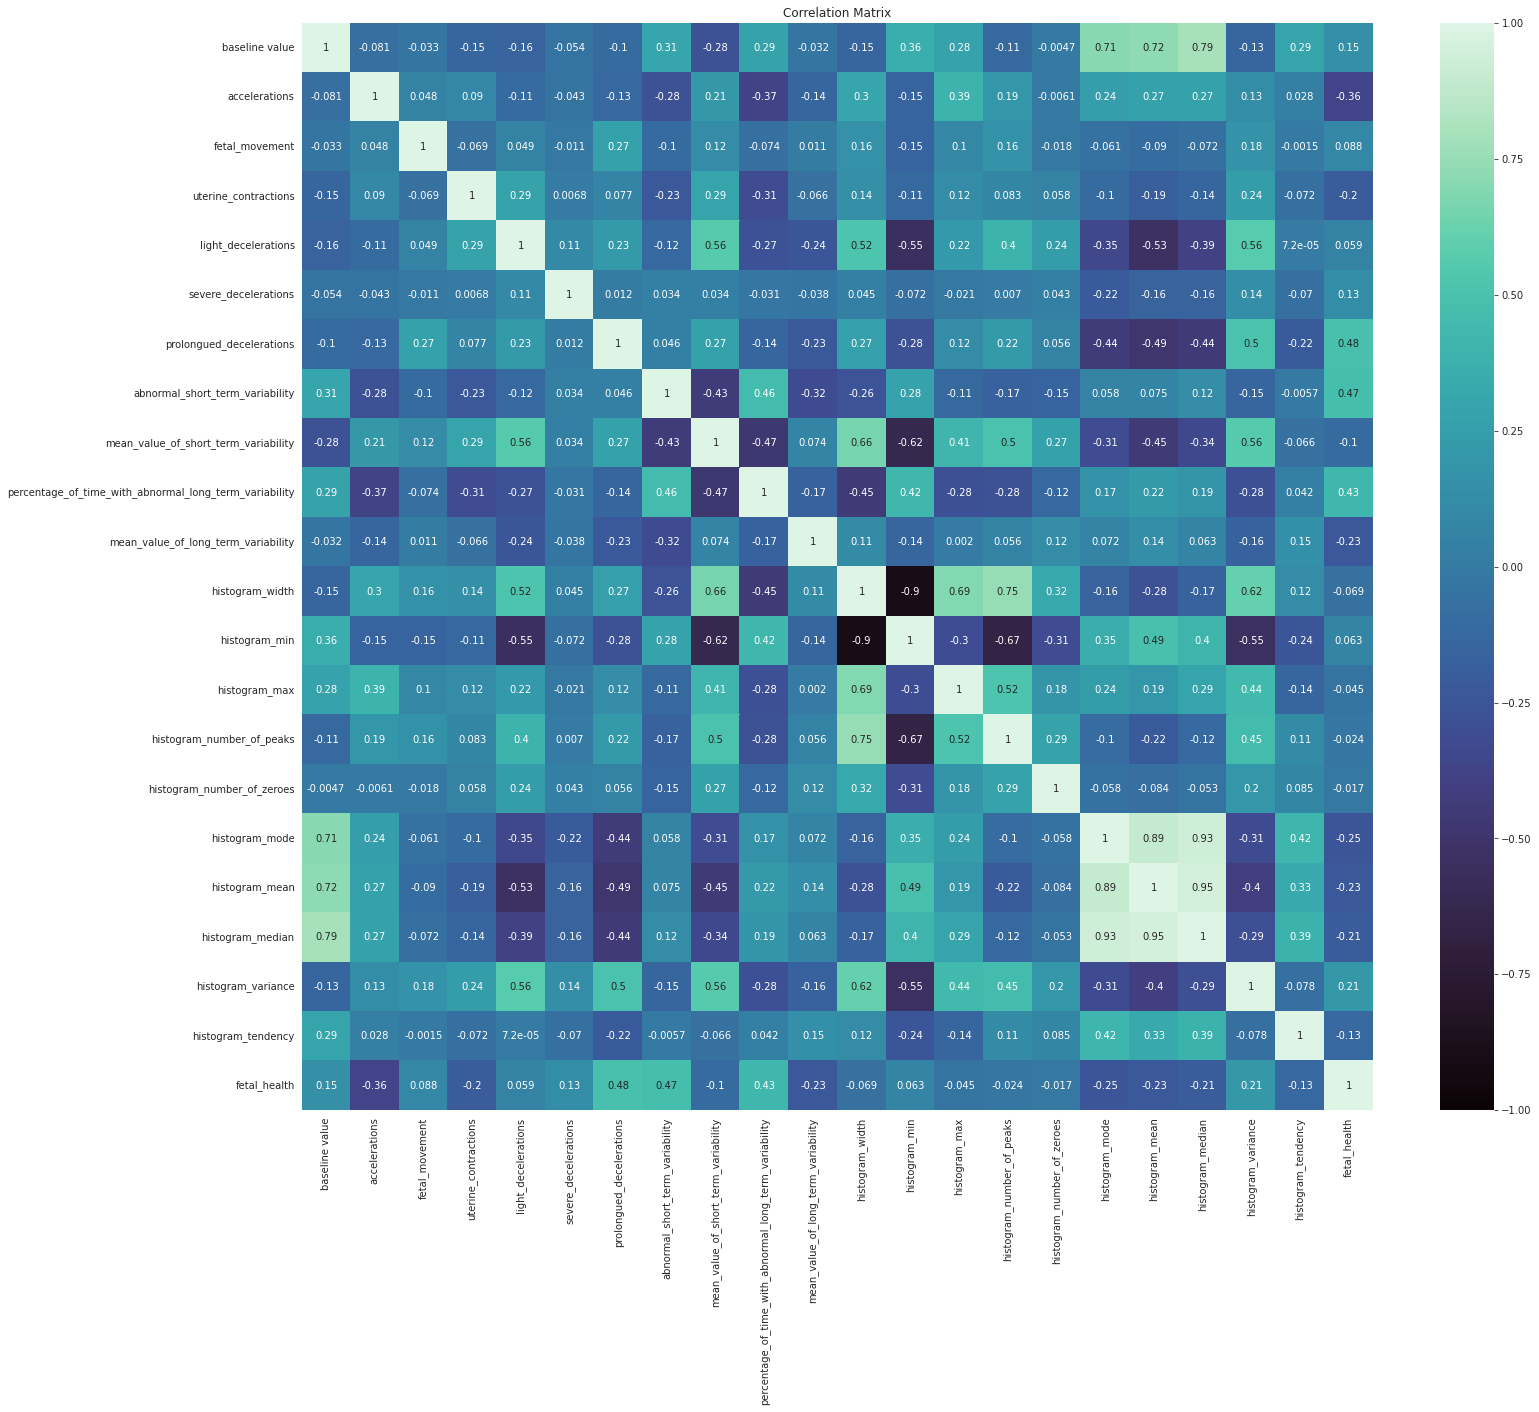

In [ ]:
corr = eda_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

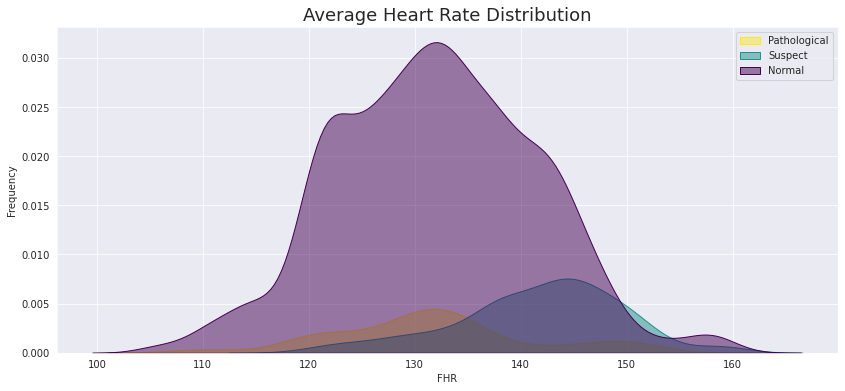

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["baseline value"], alpha=0.5,shade = True, ax = ax, hue=data['fetal_health'], palette="viridis")
plt.title('Average Heart Rate Distribution', fontsize = 18)
ax.set_xlabel("FHR")
ax.set_ylabel("Frequency")


ax.legend(['Pathological','Suspect','Normal'])

plt.show()

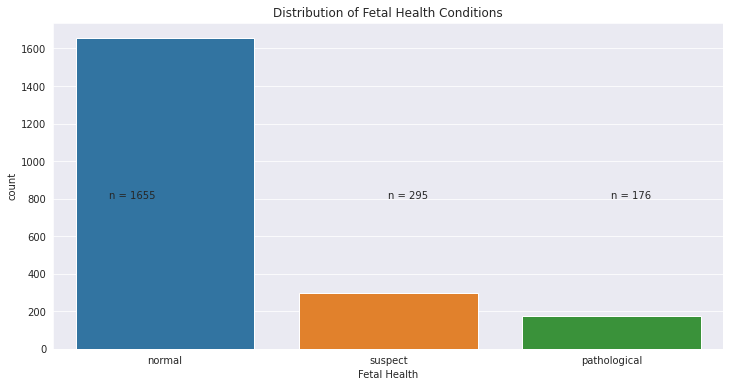

In [ ]:
labels = ['normal',
         'suspect',
         'pathological']
fig, ax = plt.subplots(figsize=(12,6))
_ = sns.countplot(data.fetal_health)
_ = ax.set_xlabel('Fetal Health')
_ = ax.set_xticklabels(labels)
_ = plt.title('Distribution of Fetal Health Conditions')
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[1]}", x = -0.25, y = 800)
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[2]}", x = 1, y = 800)
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[3]}", x = 2, y = 800)

In [ ]:
def getall_visuals(data,column,xlabel, bins = 50):
   
    fig = plt.figure(figsize=(12, 10))

    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    sub1 = fig.add_subplot(2,3,1) # two rows, two columns, fist cell


    # Create second axes, the top-left plot with orange plot
    sub2 = fig.add_subplot(2,3,2) 

    #third ax, top right
    sub3 = fig.add_subplot(2,3,3) 

    # Create forth ax
    sub4 = fig.add_subplot(2,2,(3,4)) 

    sns.histplot(data[data['fetal_health']==1][column] , ax=sub1, color = 'g')
    sns.histplot(data[data['fetal_health']==2][column] , ax=sub2, color = 'r')
    sns.histplot(data[data['fetal_health']==3][column] , ax=sub3, color = 'y')
    
    sub1.set_xlabel(xlabel + ' of Normal')
    sub2.set_xlabel(xlabel + ' of Suspicious')
    sub3.set_xlabel(xlabel + ' of Pathological')
    sub4.set_xlabel(xlabel + ' of All')
    
    
    sns.histplot(data[column] , ax=sub4, bins=bins)

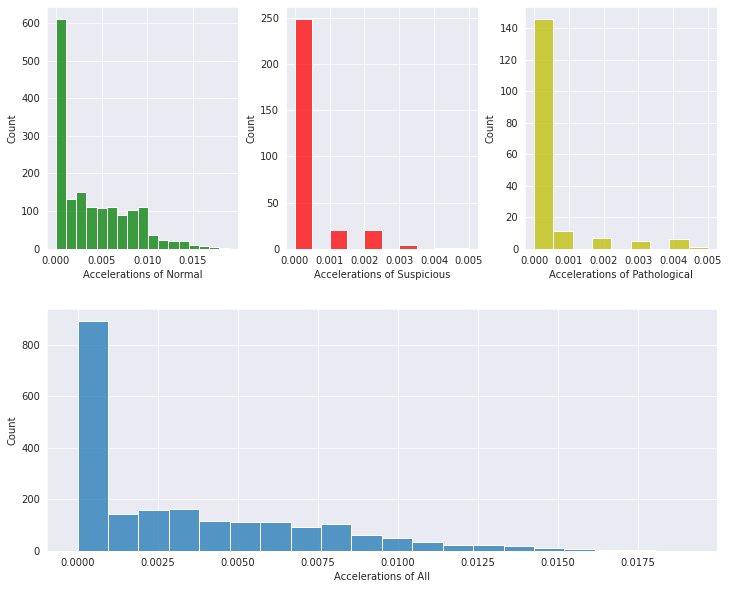

In [ ]:
getall_visuals(data, 'accelerations', 'Accelerations', 20 )

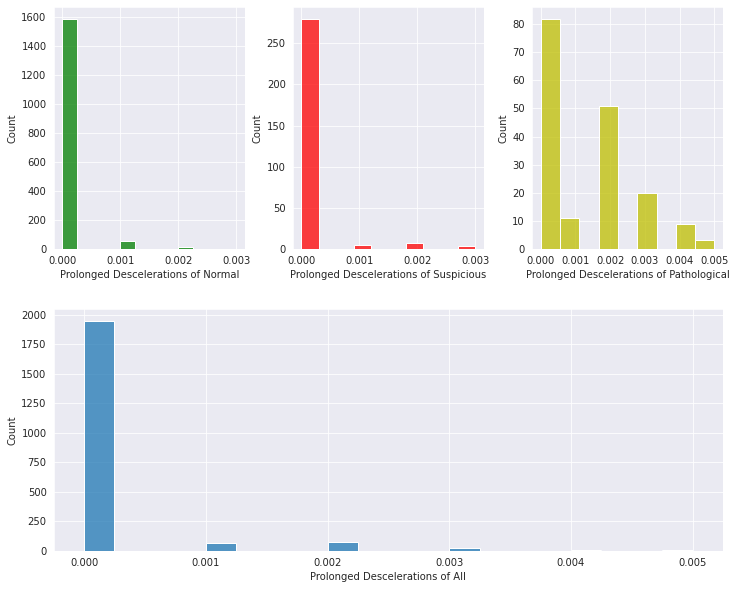

In [ ]:
getall_visuals(data, 'prolongued_decelerations', 'Prolonged Descelerations', 20 )

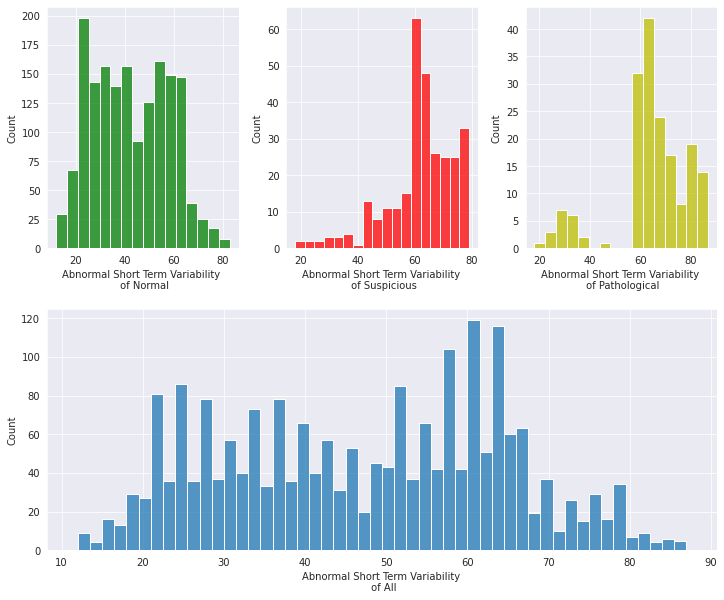

In [ ]:
getall_visuals(data, 'abnormal_short_term_variability', 'Abnormal Short Term Variability \n', 50)

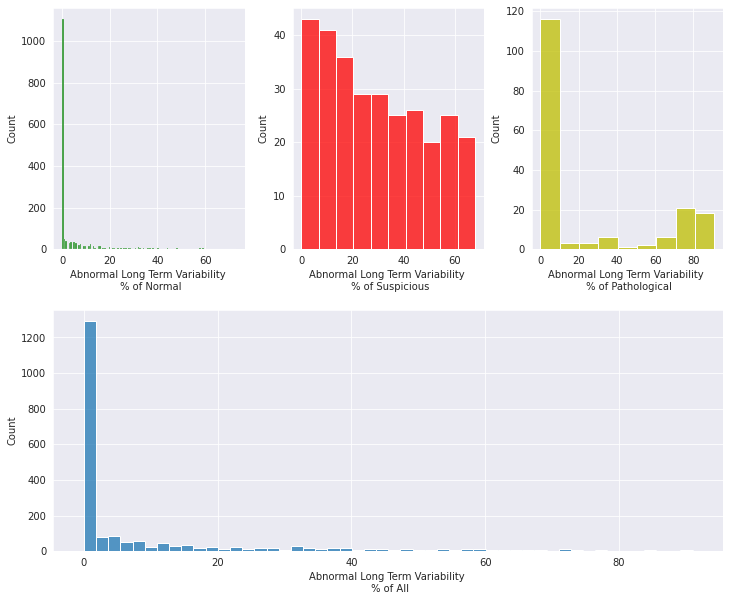

In [ ]:
getall_visuals(data,'percentage_of_time_with_abnormal_long_term_variability', 'Abnormal Long Term Variability \n %', 50)

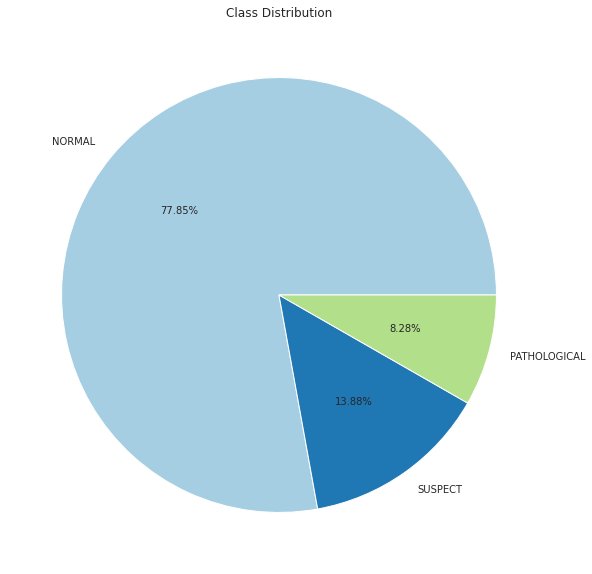

In [ ]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
    colors=sns.color_palette("Paired")
)

plt.title("Class Distribution")
plt.show()

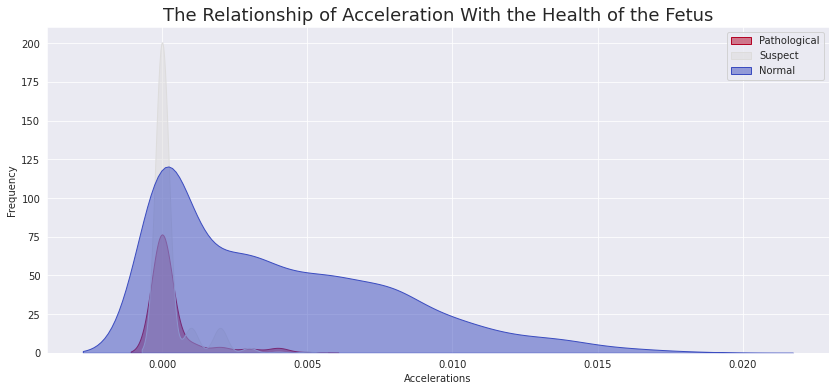

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["accelerations"], alpha=0.5,shade = True, ax = ax, hue=data['fetal_health'], palette="coolwarm")
plt.title('The Relationship of Acceleration With the Health of the Fetus', fontsize = 18)
ax.set_xlabel("Accelerations")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

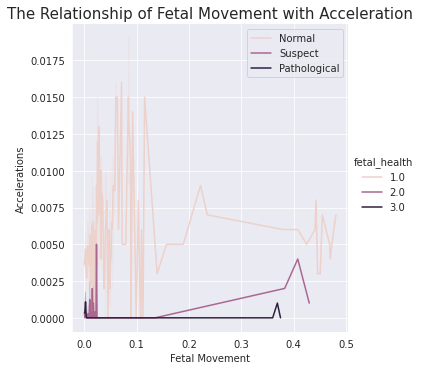

In [ ]:
sns.set_style('darkgrid')

sns.relplot(x="fetal_movement", y="accelerations", hue="fetal_health", kind="line", data=data) 
plt.title('The Relationship of Fetal Movement with Acceleration', fontsize = 15)
plt.legend(['Normal','Suspect','Pathological'])
plt.xlabel('Fetal Movement')
plt.ylabel('Accelerations')
plt.show()

In [ ]:
correlation = data.corr().round(2)

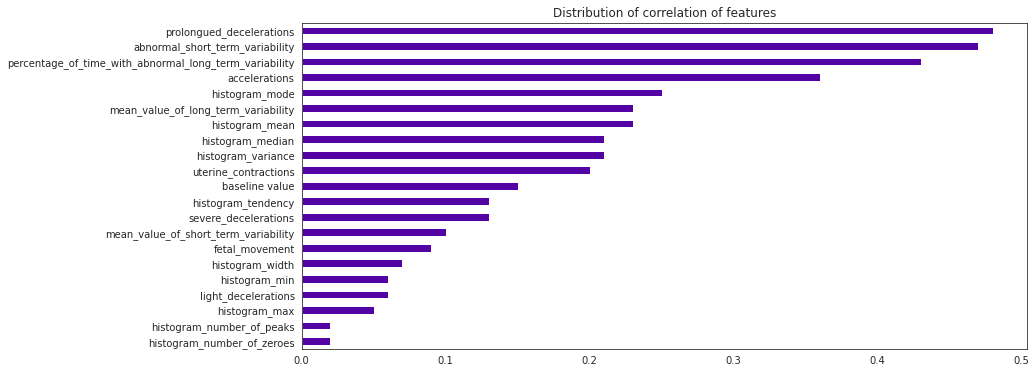

In [ ]:
sns.set_style('white')
sns.set_palette('plasma')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['fetal_health']).sort_values()[:-1].plot.barh()
plt.show()

# Preprocessing

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Rename target values
    df['fetal_health'] = df['fetal_health'].replace({
        1.0: "NORMAL",
        2.0: "SUSPECT",
        3.0: "PATHOLOGICAL"
    })
    
    # Split df into X and y
    y = df['fetal_health']
    X = df.drop('fetal_health', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1178,-0.754973,0.731770,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,-1.269308,0.073240,-0.537234,...,-0.595014,0.477137,-0.506937,-0.716047,-0.454252,-0.263063,0.035465,-0.208156,-0.340585,-0.525276
408,1.740547,-0.822284,-0.204095,-1.477290,-0.316227,-0.051917,-0.277438,1.688720,-1.297591,1.827866,...,-0.931081,1.023066,-0.338574,-1.061197,-0.454252,1.019938,1.198135,1.178619,-0.618965,1.096324
802,1.324627,-0.822284,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,1.050714,-1.069119,1.277843,...,-1.060338,1.398392,-0.001848,-1.061197,-0.454252,0.775557,0.939764,0.901264,-0.618965,-0.525276
22,-0.547013,-0.822284,7.146148,-0.462889,0.353589,-0.051917,4.696388,-0.747303,1.329835,-0.537234,...,1.912562,-1.331252,1.962388,2.390302,0.936543,-3.806591,-2.289874,-2.496335,4.496267,-2.146877
204,-1.378853,-0.822284,-0.028041,-1.477290,-0.651135,-0.051917,-0.277438,0.238707,-0.726411,0.287801,...,-1.293000,0.545379,-1.909963,-1.061197,0.936543,-0.874016,-0.868833,-1.040221,-0.653763,-0.525276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.027113,-0.822284,-0.204095,0.551513,2.363036,-0.051917,-0.277438,-1.559311,1.558307,-0.537234,...,0.697551,-1.024167,-0.170211,1.009703,-0.454252,-0.079777,-0.675055,-0.277495,1.468885,1.096324
905,1.324627,-0.822284,-0.204095,0.889646,1.023405,-0.051917,-0.277438,-0.979305,-0.269468,-0.537234,...,-0.310650,0.204173,-0.338574,-0.370897,-0.454252,0.592271,0.552207,0.623909,-0.479775,1.096324
1096,-1.066913,3.580871,-0.204095,-0.801023,-0.651135,-0.051917,-0.277438,-1.327308,0.987127,-0.537234,...,-0.491609,0.238294,-0.675300,-1.061197,-0.454252,-0.079777,-0.093720,-0.208156,-0.479775,-0.525276
235,-1.274873,-0.045257,-0.072054,-1.477290,-0.651135,-0.051917,-0.277438,0.528709,-0.840647,-0.427229,...,0.154673,-1.058287,-1.404874,-0.370897,-0.454252,-0.629635,-0.416684,-0.624189,-0.549370,1.096324


In [ ]:
y_train

1178          NORMAL
408          SUSPECT
802          SUSPECT
22      PATHOLOGICAL
204           NORMAL
            ...     
960           NORMAL
905           NORMAL
1096          NORMAL
235           NORMAL
1061          NORMAL
Name: fetal_health, Length: 1488, dtype: object

# pycaret

#Importing packages

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install markupsafe==2.0.1
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jinja2

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
data_seen = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(data_seen.index)

data_seen.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1913, 22)
Unseen Data For Predictions: (213, 22)


In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'fetal_health', session_id=123)

,Description,Value
0,session_id,123
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2126, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9543,0.9849,0.9039,0.9545,0.9529,0.8713,0.8734,5.366
lightgbm,Light Gradient Boosting Machine,0.9469,0.9859,0.8994,0.9477,0.9462,0.8531,0.8545,0.250
gbc,Gradient Boosting Classifier,0.9449,0.9793,0.8897,0.9455,0.9435,0.8456,0.8480,1.182
rf,Random Forest Classifier,0.9429,0.9869,0.8735,0.9425,0.9404,0.8364,0.8401,0.761
et,Extra Trees Classifier,0.9254,0.9833,0.8268,0.9235,0.9216,0.7832,0.7880,0.456
dt,Decision Tree Classifier,0.9180,0.8861,0.8590,0.9185,0.9173,0.7751,0.7761,0.042
knn,K Neighbors Classifier,0.8924,0.9195,0.7597,0.8869,0.8867,0.6838,0.6903,0.147
ada,Ada Boost Classifier,0.8851,0.8656,0.7977,0.8889,0.8838,0.6818,0.6862,0.295
lr,Logistic Regression,0.8817,0.9281,0.7459,0.8753,0.8747,0.6553,0.6621,1.384
lda,Linear Discriminant Analysis,0.8777,0.9546,0.7430,0.8758,0.8753,0.6571,0.6589,0.018


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'fetal_health', session_id=123) 

,Description,Value
0,session_id,123
1,Target,fetal_health
2,Original Data,"(2126, 22)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1488, 21)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1114,0.0552,0.2325,0.8504,0.0877,0.0786,2.584
et,Extra Trees Regressor,0.1036,0.0555,0.2334,0.8480,0.0872,0.0705,0.491
rf,Random Forest Regressor,0.0965,0.0579,0.2377,0.8427,0.0901,0.0675,0.792
lightgbm,Light Gradient Boosting Machine,0.1236,0.0607,0.2430,0.8348,0.0929,0.0905,0.086
gbr,Gradient Boosting Regressor,0.1275,0.0611,0.2454,0.8324,0.0936,0.0923,0.246
dt,Decision Tree Regressor,0.0823,0.0983,0.3074,0.7319,0.1161,0.0551,0.020
knn,K Neighbors Regressor,0.1504,0.1125,0.3317,0.6952,0.1240,0.0961,0.062
lar,Least Angle Regression,0.2851,0.1580,0.3968,0.5638,0.1534,0.2176,0.015
lr,Linear Regression,0.2852,0.1582,0.3970,0.5636,0.1533,0.2179,0.012
ridge,Ridge Regression,0.3088,0.1794,0.4229,0.5068,0.1654,0.2373,0.013
